In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
from sklearn.compose import ColumnTransformer
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

from transformers import BertModel, BertTokenizer
import torch
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# convert word embeddings to vectors is the first step, in job_title there is text(including numbers), ignore location, understand embedding model first and apply on the job_title for now, bert, doc-to-vec, etc embedding models

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/
!ls

/content/drive/MyDrive/Colab Notebooks
'Apziva Project 2 - Term Deposit Marketing.ipynb'
'potential-talents - Aspiring human resources - seeking human resources.csv'
'potential-talents - Aspiring human resources - seeking human resources.gsheet'
'Project 3 - Potential_Talents_ Apziva.ipynb'
 term-deposit-marketing-2020.csv


In [4]:
#Reading the csv file data into the notebook
import pandas as pd
df = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')
df
#df.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN


In [5]:
#Dataset stats and description
df.shape
df.describe()

,id,fit
count,104.000000,0.0
mean,52.500000,NaN
std,30.166206,NaN
min,1.000000,NaN
25%,26.750000,NaN
50%,52.500000,NaN
75%,78.250000,NaN
max,104.000000,NaN


In [6]:
df.dtypes

id              int64
job_title      object
location       object
connection     object
fit           float64
dtype: object

In [7]:
#Checking for null values
df.isnull().sum()

id              0
job_title       0
location        0
connection      0
fit           104
dtype: int64

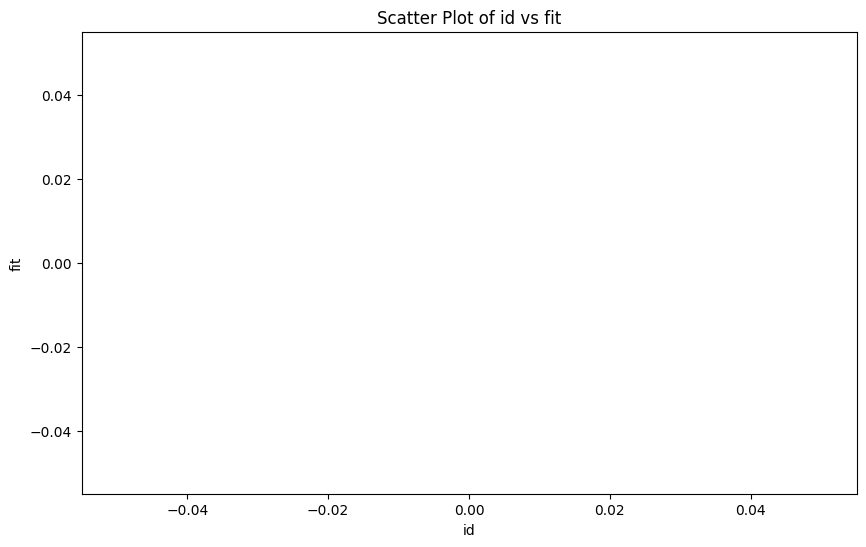

In [8]:
# Scatter Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='id', y='fit', palette='viridis')
plt.title('Scatter Plot of id vs fit')
plt.xlabel('id')
plt.ylabel('fit')
plt.show()

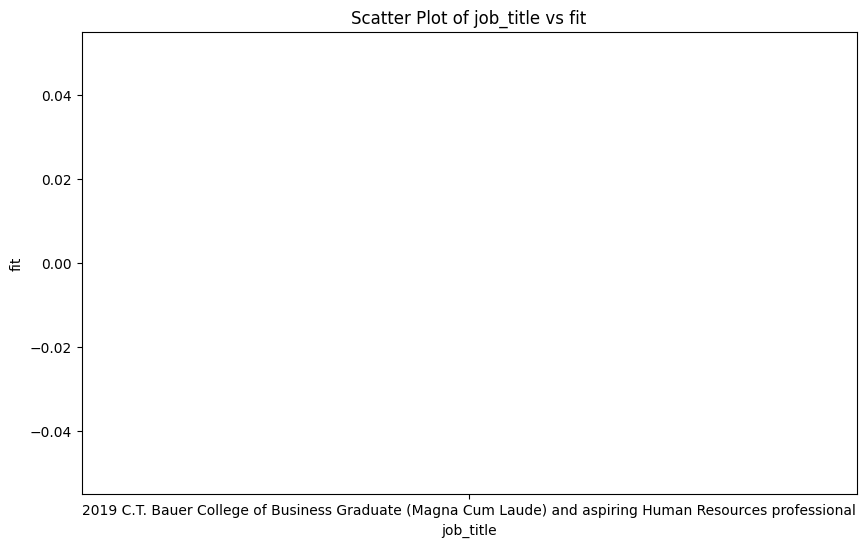

In [9]:
# Scatter Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='job_title', y='fit', palette='viridis')
plt.title('Scatter Plot of job_title vs fit')
plt.xlabel('job_title')
plt.ylabel('fit')
plt.show()

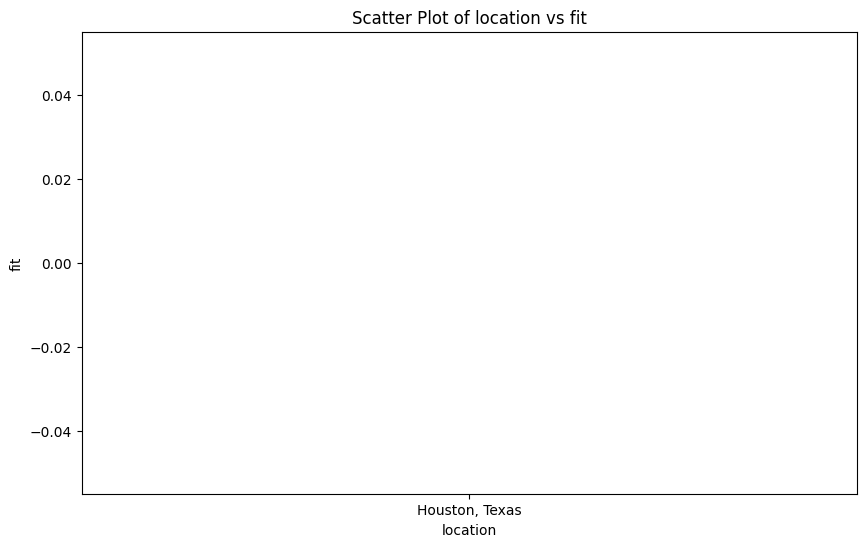

In [10]:
# Scatter Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='location', y='fit', palette='viridis')
plt.title('Scatter Plot of location vs fit')
plt.xlabel('location')
plt.ylabel('fit')
plt.show()

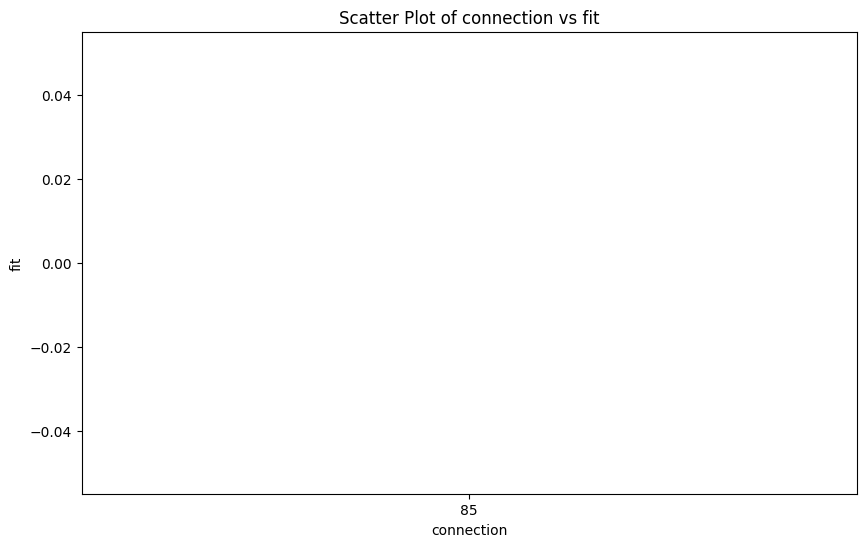

In [11]:
# Scatter Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='connection', y='fit', palette='viridis')
plt.title('Scatter Plot of connection vs fit')
plt.xlabel('connection')
plt.ylabel('fit')
plt.show()

In [12]:
pip install pandas transformers

In [13]:
# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Function to get BERT embeddings for a given text
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    embeddings = torch.mean(outputs.last_hidden_state, dim=1).squeeze().detach().numpy()
    return embeddings

# Apply BERT embeddings to job titles
df['job_title_embeddings_bert'] = df['job_title'].apply(get_bert_embedding)

# Display the resulting DataFrame
print(df[['id', 'job_title', 'job_title_embeddings_bert']])

# Now do the word embedding for the job_title, get similarity scores, after using 2 models create weighted sum and get weighted scores of all these similarities, higher similarities, dont split into train test, use only pre trained data, if u want you can use sentence bert, 4 cosign similarities scores with both set of keywords, sum or weighted sum and get good ranked candidates.

      id                                          job_title  \
0      1  2019 C.T. Bauer College of Business Graduate (...   
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                             job_title_embeddings_bert  
0    [-0.4133847, 0.07943056, 0.13103572, -0.063541...  
1    [-0.47320265, -0.04826158, 0.05471508, -0.3529...  
2    [-0.017994344, -0.120408125, -0.052445684, 0.0...  
3    [-0.359290

In [14]:
# Function to calculate similarity between embeddings
def calculate_similarity(embeddings1, embeddings2):
    return cosine_similarity(embeddings1.reshape(1, -1), embeddings2.reshape(1, -1))[0][0]

# Keywords
keyword1 = "aspiring human resources"
keyword2 = "seeking human resources"

# Get embeddings for job titles
df['job_title_embeddings_bert'] = df['job_title'].apply(get_bert_embedding)

# Get embeddings for the first keyword
keyword_embeddings_bert1 = get_bert_embedding(keyword1)  # Using BERT for the first keyword

# Calculate similarities for BERT embeddings with the first keyword
df['similarity_bert_1'] = df.apply(lambda row: calculate_similarity(row['job_title_embeddings_bert'], keyword_embeddings_bert1), axis=1)

# Get embeddings for the second keyword
keyword_embeddings_bert2 = get_bert_embedding(keyword2)  # Using BERT for the second keyword

# Calculate similarities for BERT embeddings with the second keyword
df['similarity_bert_2'] = df.apply(lambda row: calculate_similarity(row['job_title_embeddings_bert'], keyword_embeddings_bert2), axis=1)

# Display the resulting DataFrame with similarities
print(df[['id', 'job_title', 'similarity_bert_1', 'similarity_bert_2']])
# def cosine_similarity(vector1, vector2): error max recursion depth error - avoid it...

      id                                          job_title  \
0      1  2019 C.T. Bauer College of Business Graduate (...   
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

     similarity_bert_1  similarity_bert_2  
0             0.587713           0.534470  
1             0.546801           0.529103  
2             0.902632           0.794786  
3             0.752288           0.738064  
4             0.430944 

In [15]:
pip install pandas gensim

In [16]:
# Tokenize job titles
tokenized_titles = [word_tokenize(title.lower()) for title in df['job_title']]

# Create TaggedDocument objects for Doc2Vec training
tagged_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_titles)]

# Train Doc2Vec model
model = Doc2Vec(vector_size=300, window=5, min_count=1, workers=4, epochs=50)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Function to get Doc2Vec embeddings for a given text
def get_doc2vec_embedding(text):
    tokens = word_tokenize(text.lower())
    return model.infer_vector(tokens)

# Apply Doc2Vec embeddings to job titles
df['job_title_embeddings_dv'] = df['job_title'].apply(get_doc2vec_embedding)

# Display the resulting DataFrame
print(df[['id', 'job_title', 'job_title_embeddings_dv']])

      id                                          job_title  \
0      1  2019 C.T. Bauer College of Business Graduate (...   
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                               job_title_embeddings_dv  
0    [0.008332202, 0.04256391, 0.0087353755, -0.005...  
1    [0.015512373, 0.07307905, 0.015142705, -0.0062...  
2    [0.00065031124, 0.0068249614, 0.00074226863, -...  
3    [0.0135607

In [19]:
# Function to calculate similarity between embeddings
def calculate_similarity(embeddings1, embeddings2):
    return cosine_similarity(embeddings1.reshape(1, -1), embeddings2.reshape(1, -1))[0][0]

# Keywords
keyword1 = "aspiring human resources"
keyword2 = "seeking human resources"

# Get embeddings for the first keyword
keyword_tokens1 = word_tokenize(keyword1.lower())
keyword_embeddings_dv1 = model.infer_vector(keyword_tokens1)

# Calculate similarities for Doc2Vec embeddings with the first keyword
df['similarity_dv_1'] = df.apply(lambda row: calculate_similarity(row['job_title_embeddings_dv'], keyword_embeddings_dv1), axis=1)

# Get embeddings for the second keyword
keyword_tokens2 = word_tokenize(keyword2.lower())
keyword_embeddings_dv2 = model.infer_vector(keyword_tokens2)

# Calculate similarities for Doc2Vec embeddings with the second keyword
df['similarity_dv_2'] = df.apply(lambda row: calculate_similarity(row['job_title_embeddings_dv'], keyword_embeddings_dv2), axis=1)

# Display the resulting DataFrame with similarities
print(df[['id', 'job_title', 'similarity_dv_1', 'similarity_dv_2']])

# get similarities between keywords and job_title not two models
# you will get 2 similarities for bert and 2 for doc2vec and add the similirites using weighted average after summation you get highest ranked candidate

      id                                          job_title  similarity_dv_1  \
0      1  2019 C.T. Bauer College of Business Graduate (...         0.987096   
1      2  Native English Teacher at EPIK (English Progra...         0.987529   
2      3              Aspiring Human Resources Professional         0.970240   
3      4             People Development Coordinator at Ryan         0.988008   
4      5    Advisory Board Member at Celal Bayar University         0.988395   
..   ...                                                ...              ...   
99   100  Aspiring Human Resources Manager | Graduating ...         0.988608   
100  101              Human Resources Generalist at Loparex         0.988240   
101  102   Business Intelligence and Analytics at Travelers         0.988501   
102  103                     Always set them up for Success         0.988600   
103  104   Director Of Administration at Excellence Logging         0.988684   

     similarity_dv_2  
0           0.96

In [20]:
# Define weights for BERT and Doc2Vec similarities
weight_bert = 0.5  # Weight for BERT similarities
weight_doc2vec = 0.5 # Weight for Doc2Vec similarities

# Calculate weighted average similarity
df['weighted_similarity'] = (weight_bert * (df['similarity_bert_1'] + df['similarity_bert_2']) +
                             weight_doc2vec * (df['similarity_dv_1'] + df['similarity_dv_2']))

# Get the highest ranked candidate
highest_ranked_candidate = df[df['weighted_similarity'] == df['weighted_similarity'].max()]

# Display the highest ranked candidate
print("Highest Ranked Candidate:")
print(highest_ranked_candidate[['id', 'job_title', 'weighted_similarity']])

# Embedding models have multiple solutions not one, and you need to experiment with other models depending on the dataset and the question you are trying to answer

Highest Ranked Candidate:
    id                              job_title  weighted_similarity
29  30  Seeking Human Resources Opportunities             1.858414


In [28]:
# Sort candidates based on weighted similarity in the descending order and comment "these candidates are more relevant to what are looking for interviews"
# Sort candidates based on weighted similarity in descending order
df_sorted = df.sort_values(by='weighted_similarity', ascending=False)

# Display the sorted DataFrame
print("The most relevant candidates we are looking for:  ")
print(df_sorted.head(10))

The most relevant candidates we are looking for:  
    id                              job_title  \
29  30  Seeking Human Resources Opportunities   
27  28  Seeking Human Resources Opportunities   
98  99       Seeking Human Resources Position   
20  21  Aspiring Human Resources Professional   
16  17  Aspiring Human Resources Professional   
45  46  Aspiring Human Resources Professional   
32  33  Aspiring Human Resources Professional   
96  97  Aspiring Human Resources Professional   
23  24    Aspiring Human Resources Specialist   
59  60    Aspiring Human Resources Specialist   

                               location connection  fit  \
29                    Chicago, Illinois        390  NaN   
27                    Chicago, Illinois        390  NaN   
98               Las Vegas, Nevada Area         48  NaN   
20  Raleigh-Durham, North Carolina Area         44  NaN   
16  Raleigh-Durham, North Carolina Area         44  NaN   
45  Raleigh-Durham, North Carolina Area         44  NaN

In [ ]:
# Bonus questions:
# Question 1) We are interested in a robust algorithm, tell us how your solution works and show us how your ranking gets better with each starring action.
# Answer: Solution in this project uses two embedding techniques: BERT and Doc2vec that capture semantic similarities(degree of resemblance between 2 words or texts in terms of their meaning) through Cosine similarity between job titles.
#         Then BERT and Doc2Vec embeddings are generated for job_title and the predefined keywords. Using Cosine similarity, similarity scores are calculated between job_title embedding and the keyword embedding.
#         By calculating weighted average of the similarity scores using BERT and Doc2vec, the weights are adjusted based on user's preferences. Finally, candidates are sorted in descending order based on their weighted similarity scores to get best relevant candidates.

# Question 2) How can we filter out candidates which in the first place should not be in this list?
# Answer: If you set a threshold for a weighted similarity score and the candidates that fall below this weighted similarity score can be eliminated or filtered out as they do not match the defined weighted similarity score.

# Question 3) Can we determine a cut-off point that would work for other roles without losing high potential candidates?
# Answer: By considering the precision and recall concepts here and also threshold. i.e. precision and recall are important to consider in the classification problems here we are classifying the highest ranked candidate by calculating the weighted similarity score based on the job_title column. Precision gives the proportion of true positives amongst all instances predicted as positive.
#         Recall gives proportion of the true positives amongst all the instances identified as actual positives. With high threshold, we can miss the relevant candidates(false negatives) and lower threshold can result in higher irrelevant candidates(false positives).

# Question 4) Do you have any ideas that we should explore so that we can even automate this procedure to prevent human bias?
# Answer: We can consider training machine learning models based on the data that avoids attributes like gender, race, sexual orientation etc. to avoid unnecessary human bias in the candidate selection process and focus solely on job related information such as skills, certifications etc. And by doing feature engineering of these aspects and doing regular assessment of your model and training it on a diverse data you can automate this procedure to prevent human bias.
